## Author : Syed Muhammad Usman Ghani
## Task 2 : Prediction using Unsupervised Machine Learning

**GRIP @ The Sparks Foundation**
**This notebook will walk through some of the basics of K-Means Clustering.

## DECLARING LIBRARIES

In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sklearn.metrics as sm

## LOADING DATASET

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
features = iris.data

In [7]:
np.shape(features)

(150, 4)

In [8]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## PLOTTING DATA

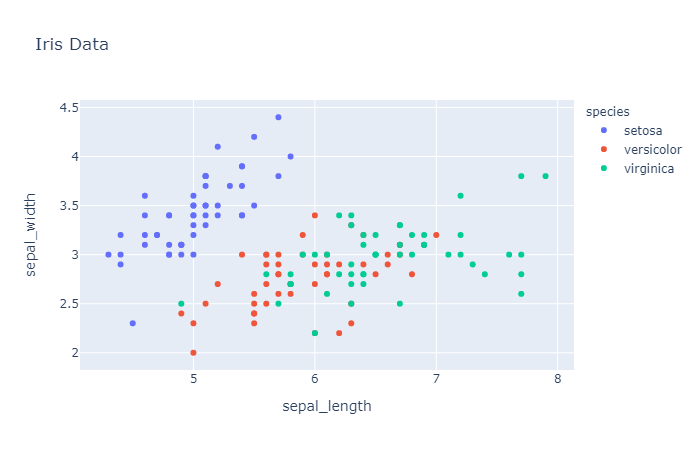

In [9]:
df = px.data.iris()
fig = px.scatter(df, y="sepal_width", x="sepal_length", color="species",title='Iris Data')
fig.show('png')

## **OBSERVING DATA SCALE**

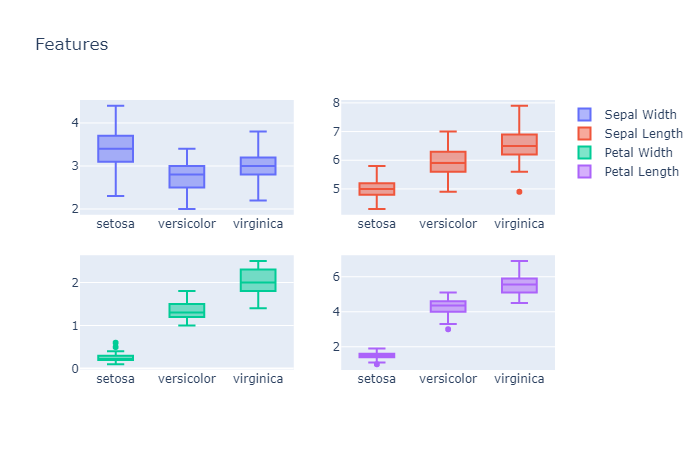

In [10]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Box(y=df["sepal_width"],x=df['species'],name='Sepal Width'),row=1, col=1)
fig.add_trace(go.Box(y=df["sepal_length"],x=df['species'],name='Sepal Length'),row=1, col=2)
fig.add_trace(go.Box(y=df["petal_width"],x=df['species'],name='Petal Width'),row=2, col=1)
fig.add_trace(go.Box(y=df["petal_length"],x=df['species'],name='Petal Length'),row=2, col=2)
fig.update_layout(title_text="Features")
fig.show('png')

**All the features are in same range and scale so Standarizing features will not be helpful here.**

## STANDARDARIZATION

**Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.**

**The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.**

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
np.shape(scaled_features)

(150, 4)

In [13]:
scaled_features[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Choosing the Appropriate Number of Clusters

### **ELBOW METHOD**

### **i) Scaled Features**

In [14]:
kmeans_kwargs = {
        "init": "k-means++",
        "random_state": 0 }
 
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    sse.append(km.inertia_)

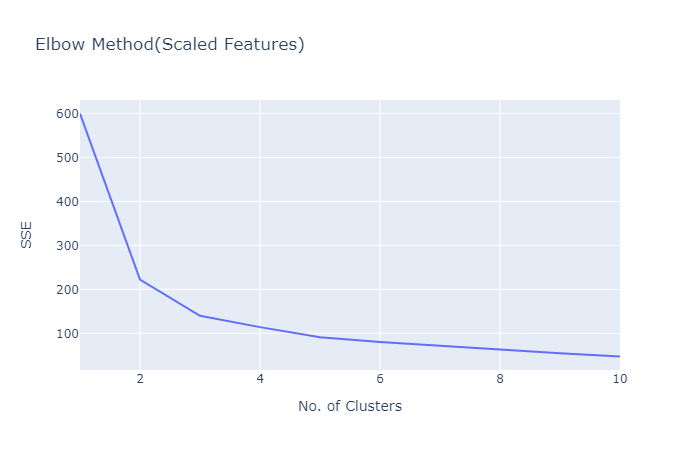

In [15]:
fig = px.line(x=range(1,11),y= sse, title='Elbow Method(Scaled Features)', labels={'x':'No. of Clusters', 'y':'SSE'})
fig.show('png')

**When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.**

**There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.**

In [16]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [17]:
print('The appropriate number of clusters are:',kl.knee)

The appropriate number of clusters are: 3


### **ii) Features**

In [18]:
# A list holds the SSE values for each k
sse_2 = []
for k in range(1, 11):
    km_2 = KMeans(n_clusters=k, **kmeans_kwargs)
    km_2.fit(features)
    sse_2.append(km_2.inertia_)

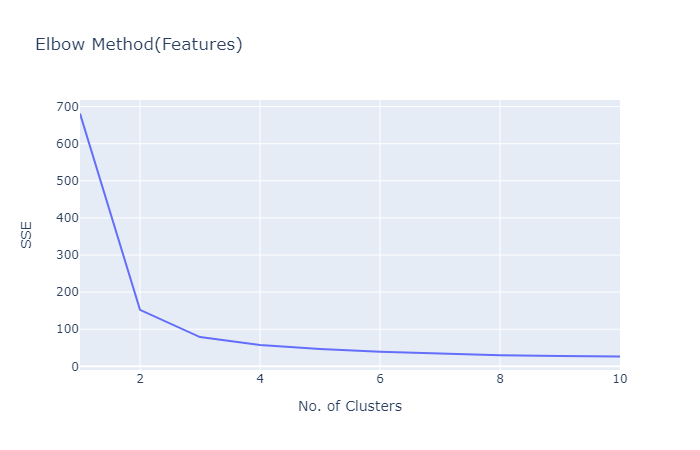

In [19]:
fig = px.line(x=range(1,11),y= sse_2, title='Elbow Method(Features)', labels={'x':'No. of Clusters', 'y':'SSE'})
fig.show('png')

In [20]:
kl2 = KneeLocator(range(1, 11), sse_2, curve="convex", direction="decreasing")

In [21]:
print('The appropriate number of clusters are:',kl2.knee)

The appropriate number of clusters are: 3


## TRAINING ALGORITHM

### **i) Scaled Features**

In [22]:
kmean = KMeans(
      init = 'k-means++',
      n_clusters=3,
      random_state = 0
    )

In [23]:
y_kmeans = kmean.fit(scaled_features)

In [24]:
print('Lowest SSE Value: {}'.format(y_kmeans.inertia_))
print('Number of iteration completed: {}'.format(y_kmeans.n_iter_))
print('Centeroids:\n{}'.format(y_kmeans.cluster_centers_))

Lowest SSE Value: 139.82049635974974
Number of iteration completed: 5
Centeroids:
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


### **ii) Features**

In [25]:
kmean_f = KMeans(
      init = 'k-means++',
      n_clusters=3,
      random_state = 0
    )

In [26]:
y_kmeans_f = kmean_f.fit(features)

In [27]:
print('Lowest SSE Value: {}'.format(y_kmeans_f.inertia_))
print('Number of iteration completed: {}'.format(y_kmeans_f.n_iter_))
print('Centeroids:\n{}'.format(y_kmeans_f.cluster_centers_))

Lowest SSE Value: 78.851441426146
Number of iteration completed: 3
Centeroids:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


## 4 DIMENSIONAL CLUSTERING PLOTS

In [28]:
def plot_4Dgraph(centeroids,K,f):

    # For storing Cluster index
    clusters= np.zeros(len(f))

    # For storing distribution of pixels in clusters
    point=np.zeros(K)
   
    # Storing Cluster index for each pixel
    for i in range(len(f)):
        distances=np.linalg.norm(f[i]-centeroids,axis=1)
        cluster=np.argmin(distances)
        clusters[i]=cluster

    # Plot Centeroids and pixels
    fig=plt.figure(figsize=(5,5))
    ax=Axes3D(fig)
    ax.scatter(centeroids[:, 0], centeroids[:, 1],centeroids[:,2],centeroids[:,3],marker='*', s=500, c='black')
    for i in range(K):

            points=[]
            for j in range(len(f)):
                 if clusters[j]==i:
                    points.append(f[j])
            x=[]
            y=[]
            z=[]
            m=[]
            for point1 in points:

                    k=0

                    for p1 in point1:

                        if k==0:
                            x.append(p1)

                        if k==1:
                            y.append(p1)

                        if k==2:
                            z.append(p1)
                            
                        if k==3:
                            m.append(p1)
                        k+=1


            ax.scatter(x,y,z,m,marker='o',s=40)
  
    ax.legend(['Centroids',iris.target_names[0], iris.target_names[1], iris.target_names[2]])
    plt.title('Unsupervised ML')
    plt.show()

### **i) Scaled Features**

c:\users\computer\appdata\local\programs\python\python36\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:794: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

c:\users\computer\appdata\local\programs\python\python36\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:796: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



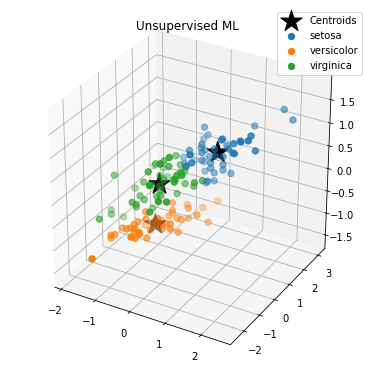

In [29]:
plot_4Dgraph(y_kmeans.cluster_centers_,3,scaled_features)

### **ii) Features**

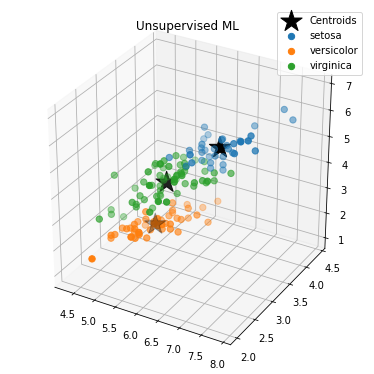

In [30]:
plot_4Dgraph(y_kmeans_f.cluster_centers_,3,features)

## 2D CLUSTER PLOTTING

In [31]:
def plot_2Dgraph(centeroids,K,f):

    # For storing Cluster index
    clusters= np.zeros(len(f))


    # For storing distribution of pixels in clusters
    point=np.zeros(K)


    # Storing Cluster index for each pixel
    for i in range(len(f)):
        distances=np.linalg.norm(f[i]-centeroids,axis=1)
        cluster=np.argmin(distances)
        clusters[i]=cluster

    # Plot Centeroids and pixels
    fig=go.Figure()
    
    for i,l in zip(range(K),iris.target_names):
           
            points=[]
            for j in range(len(f)):
                 if clusters[j]==i:
                    points.append(f[j])
                    
            x=[]
            y=[]
            for point1 in points:

                    k=0

                    for p1 in point1:

                        if k==0:
                            x.append(p1)

                        if k==1:
                            y.append(p1)
                        k+=1
                            
            fig.add_trace(go.Scatter(x=x,y=y,mode='markers', name=l))  
            
    fig.add_trace(go.Scatter(x=centeroids[:, 0],y=centeroids[:, 1],mode='markers',name='Centeroids',marker_color='rgb(105, 122, 33, 78)')) 
    fig.update_layout(title='Unsupervised ML')
    fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
    fig.show('png')

### **i) Scaled Features**

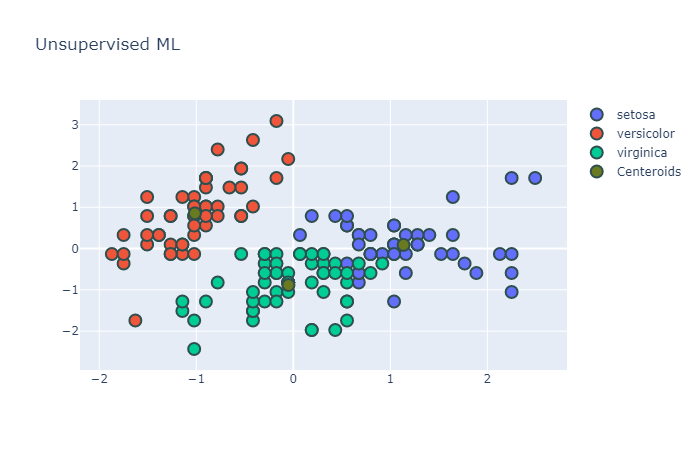

In [32]:
plot_2Dgraph(y_kmeans.cluster_centers_,3,scaled_features)

### **ii) Features**

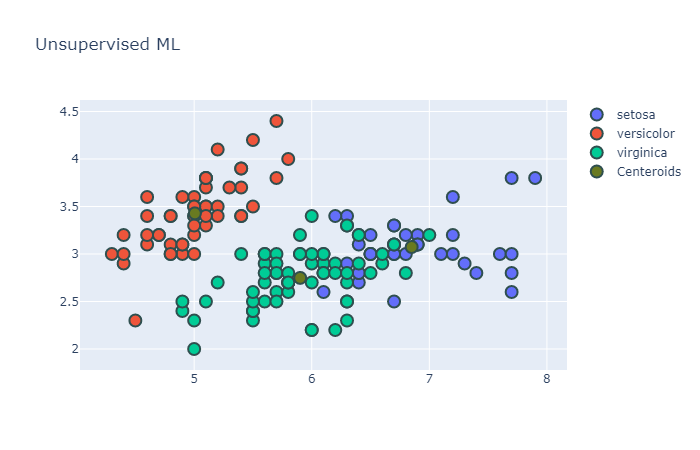

In [33]:
plot_2Dgraph(y_kmeans_f.cluster_centers_,3,features)

## EVALUATE MODEL

### **Completeness Score:**

**Its purpose is to provide a piece of information about the assignment of samples belonging to the same class**

### **i)Scaled Features**

In [34]:
y_pred_1 = y_kmeans.labels_

In [35]:
print('The accuracy is {}%.'.format(round(sm.completeness_score(iris.target,y_pred_1),4)* 100))

The accuracy is 65.98%.


### **ii)Features**

In [36]:
y_pred_2 = y_kmeans_f.labels_

In [37]:
print('The accuracy is {}%.'.format(round(sm.completeness_score(iris.target,y_pred_2),4)* 100))

The accuracy is 76.5%.


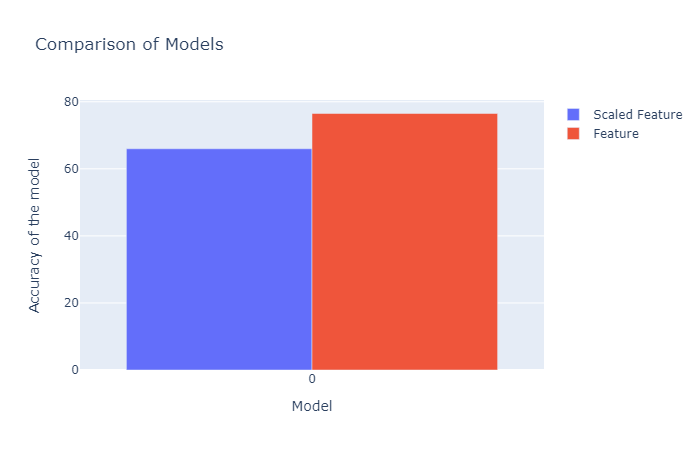

In [38]:
fig = go.Figure()
fig.add_trace(go.Bar(y=[round(sm.completeness_score(iris.target,y_pred_1),4) * 100],name='Scaled Feature'))
fig.add_trace(go.Bar(y=[round(sm.completeness_score(iris.target,y_pred_2),4) * 100],name='Feature'))
fig.update_layout(title='Comparison of Models',xaxis_title='Model',yaxis_title='Accuracy of the model')
fig.show('png')

**Hence the accuracy results show that standardization of feature will decrease the performance of K Means clustering.**